In [0]:
from fastai import *
from fastai.vision import *
from fastai.imports import *
import os

In [0]:
import json

In [0]:
from google.colab import files
files.upload()
#uploaded my kaggle.json API key

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aniketrao92","key":"b5de16e888a0b453d611caf7fec50094"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [0]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 67 Sep 25 13:52 kaggle.json
{"username":"aniketrao92","key":"b5de16e888a0b453d611caf7fec50094"}

In [0]:
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 3.1MB/s 
     |████████████████████████████████| 5.3MB 8.6MB/s 
     |████████████████████████████████| 51kB 17.2MB/s 
     |████████████████████████████████| 112kB 44.0MB/s 
     |████████████████████████████████| 112kB 43.9MB/s 


In [0]:
!kaggle datasets download -d kmader/pulmonary-chest-xray-abnormalities

100% 4.08G/4.09G [00:54<00:00, 59.5MB/s]
100% 4.09G/4.09G [00:54<00:00, 80.8MB/s]


In [0]:
path = Path('/content')

In [0]:
path.ls()

[PosixPath('/content/.config'),
 PosixPath('/content/pulmonary-chest-xray-abnormalities.zip'),
 PosixPath('/content/kaggle.json'),
 PosixPath('/content/sample_data')]

In [0]:
!unzip pulmonary-chest-xray-abnormalities.zip

Archive:  pulmonary-chest-xray-abnormalities.zip
  inflating: ChinaSet_AllFiles.zip   
  inflating: Montgomery.zip          


In [0]:
path.ls()

[PosixPath('/content/.config'),
 PosixPath('/content/pulmonary-chest-xray-abnormalities.zip'),
 PosixPath('/content/Montgomery.zip'),
 PosixPath('/content/kaggle.json'),
 PosixPath('/content/ChinaSet_AllFiles.zip'),
 PosixPath('/content/sample_data')]

In [0]:
!unzip ChinaSet_AllFiles.zip

In [0]:
!unzip Montgomery.zip

In [0]:
path.ls()

In [0]:
extract_target = lambda o : 'Normal' if '_0.png' in str(o) else 'TB'

In [0]:
traindata = (ImageList.from_folder(path = path/'ChinaSet_AllFiles'/'CXR_png')
                      .split_by_rand_pct(0.2)
                      .label_from_func(extract_target)
                      .transform(get_transforms(), size=224)
                      .databunch(bs=32)
                      .normalize(imagenet_stats)

)

In [0]:
traindata.classes, traindata.c, len(traindata.train_ds), len(traindata.valid_ds) #types of classes, number of classes, number of training data points, number of validation data points

(['Normal', 'TB'], 2, 530, 132)

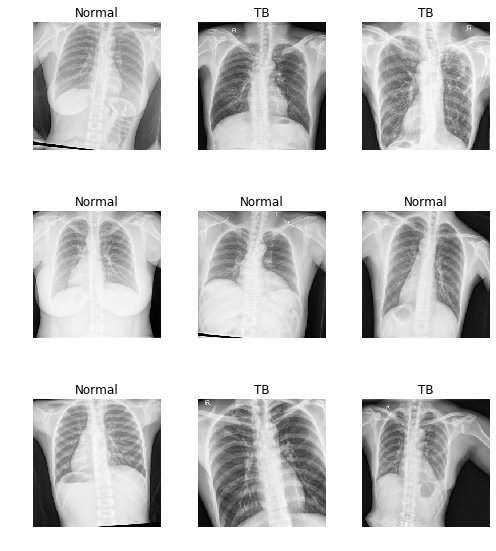

In [0]:
traindata.show_batch(rows=3, figsize=(7,8)) #9 examples from the dataset

In [0]:
learn = cnn_learner(traindata, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 94499478.15it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 1.58E-03


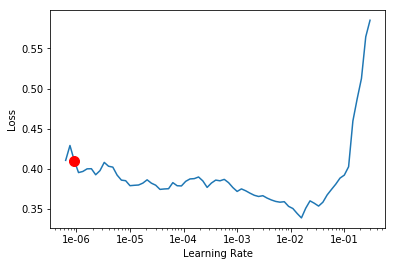

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(4,6.92e-03)

epoch,train_loss,valid_loss,accuracy,time
0,0.865846,1.347214,0.590909,01:48
1,0.754201,0.460624,0.803030,01:46
2,0.623964,0.277381,0.886364,01:47
3,0.529508,0.219441,0.909091,01:46


In [0]:
learn.fit_one_cycle(2,1.58e-03)

epoch,train_loss,valid_loss,accuracy,time
0,0.377649,0.217066,0.916667,01:50
1,0.354693,0.218688,0.909091,01:53


In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-06
Min loss divided by 10: 2.29E-05


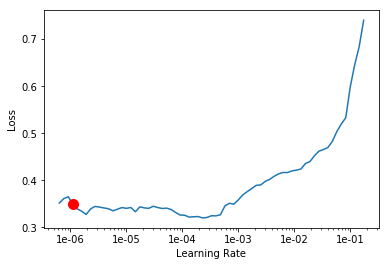

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(4, max_lr = slice(2.29e-05))

epoch,train_loss,valid_loss,accuracy,time
0,0.316378,0.225775,0.909091,01:48
1,0.325734,0.217926,0.909091,01:48
2,0.331518,0.226354,0.909091,01:52
3,0.319504,0.229089,0.909091,01:51


In [0]:
learn.save('final-model')

In [0]:
path.ls()

[PosixPath('/content/.config'),
 PosixPath('/content/MontgomerySet'),
 PosixPath('/content/pulmonary-chest-xray-abnormalities.zip'),
 PosixPath('/content/Montgomery.zip'),
 PosixPath('/content/kaggle.json'),
 PosixPath('/content/ChinaSet_AllFiles'),
 PosixPath('/content/ChinaSet_AllFiles.zip'),
 PosixPath('/content/__MACOSX'),
 PosixPath('/content/sample_data')]

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(traindata.valid_ds)==len(losses)==len(idxs)

True

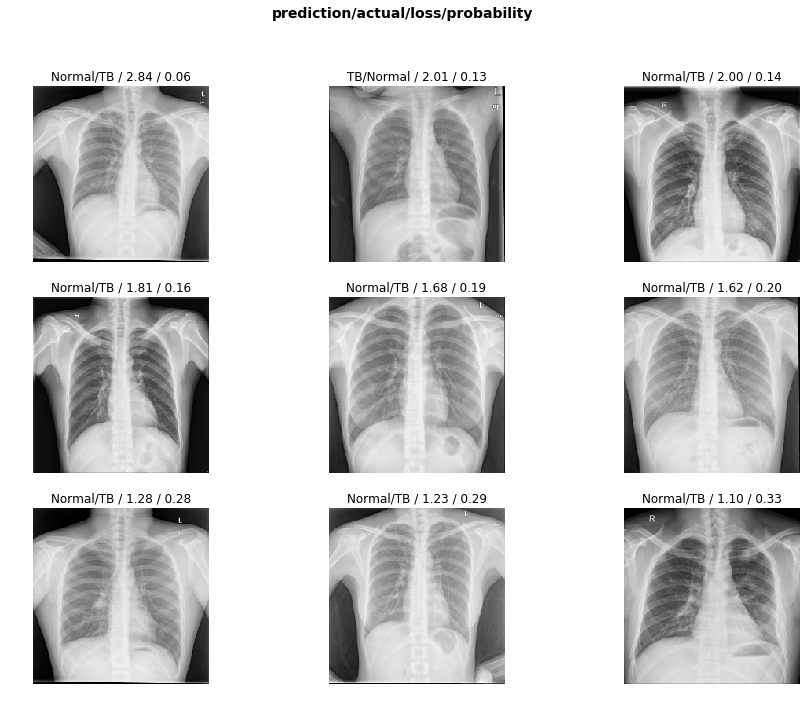

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

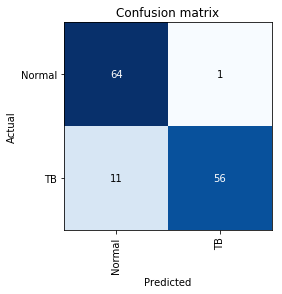

In [0]:
interp.plot_confusion_matrix()

In [0]:
img = open_image(path/'ChinaSet_AllFiles/CXR_png/CHNCXR_0001_0.png')

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class, outputs[0].item()  #Predicted class and probability

(Category Normal, 0.8812268376350403)

In [0]:
learn.export()

In [0]:
pwd

'/content'

In [0]:
learn.export('TBClassifier.pkl')